# Lab Task 1
## Graph Theory & Social Networks 2025/26
**Author**: Piotr Sikora 250389
1. Write a function random_graph(n, p), which returns a random graph in G(n, p) model — n vertices, an existence of each edge is independent and holds with probability p.

In [256]:
import random

random.seed(333)

def random_graph(n,p):
    graph = {i: set() for i in range(1,n+1)}
    for i in range(1,n+1):
        for j in range(i,n+1):
            if random.random() < p and i != j:
                graph[i].add(j)
                graph[j].add(i)
    return graph

G = random_graph(10,0.4)

G

{1: {2, 4, 6, 7, 9},
 2: {1, 3, 4, 5, 6, 10},
 3: {2, 6, 7, 8},
 4: {1, 2, 6, 9, 10},
 5: {2, 6, 8, 10},
 6: {1, 2, 3, 4, 5, 9, 10},
 7: {1, 3},
 8: {3, 5},
 9: {1, 4, 6},
 10: {2, 4, 5, 6}}

2. Write a function graph_to_matrix(graph), which converts a graph given by neighbour list into matrix representation and returns a matrix and a sequence of vertices.

In [257]:
def graph_to_matrix(graph):
    n = len(graph)
    matrix = [[0 for _ in range(n)] for _ in range(n)]
    for v in graph:
        for j in graph[v]:
            matrix[v-1][j-1] = 1
    return matrix

graph_to_matrix(G)

[[0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
 [1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
 [1, 1, 0, 0, 0, 1, 0, 0, 1, 1],
 [0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 1, 0, 0, 0, 0]]

3. Write a function matrix_to_graph(vertices, matrix) which converts in the opposite direction — convertiing a matrix (and a sequence of vertex labels) into a form of neighbour list (python dictionary).

In [258]:
def matrix_to_graph(vertices,matrix):
    n = len(vertices)
    graph = {v: set() for v in vertices}
    for i in range(n):
        for j in range(i,n):
            if matrix[i][j] == 1:
                graph[vertices[i]].add(vertices[j])
                graph[vertices[j]].add(vertices[i])
    return graph

matrix_to_graph([i+1 for i in range(10)],graph_to_matrix(G))

{1: {2, 4, 6, 7, 9},
 2: {1, 3, 4, 5, 6, 10},
 3: {2, 6, 7, 8},
 4: {1, 2, 6, 9, 10},
 5: {2, 6, 8, 10},
 6: {1, 2, 3, 4, 5, 9, 10},
 7: {1, 3},
 8: {3, 5},
 9: {1, 4, 6},
 10: {2, 4, 5, 6}}

4, Write a function cycle(n), which return a cycle on n vertices.

In [259]:
def cycle(n):
    vertices = list(range(1,n+1))
    random.shuffle(vertices) # for random order of vertices
    graph = {v:{vertices[(i+1)%len(vertices)],vertices[i-1]}  for i,v in enumerate(vertices)}
    return dict(sorted(graph.items())) # if not shufled then return graph

cycle(4)

{1: {2, 4}, 2: {1, 3}, 3: {2, 4}, 4: {1, 3}}

## Visualising the results

In [260]:
import matplotlib.pyplot as plt
import networkx as nx

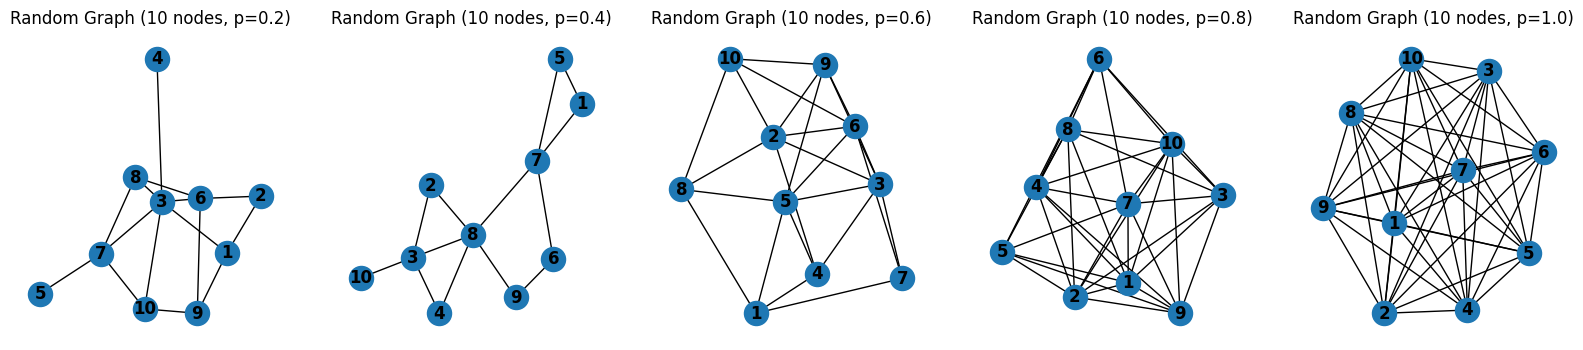

In [264]:
plt.figure(figsize=(20, 4))
for i in range(1,6):
    p = i/5
    graph = random_graph(10, p)
    nx_graph = nx.Graph(graph)
    subax1 = plt.subplot(150+i)
    nx.draw(nx_graph, with_labels=True, font_weight='bold')
    subax1.set_title(f"Random Graph (10 nodes, p={p})")

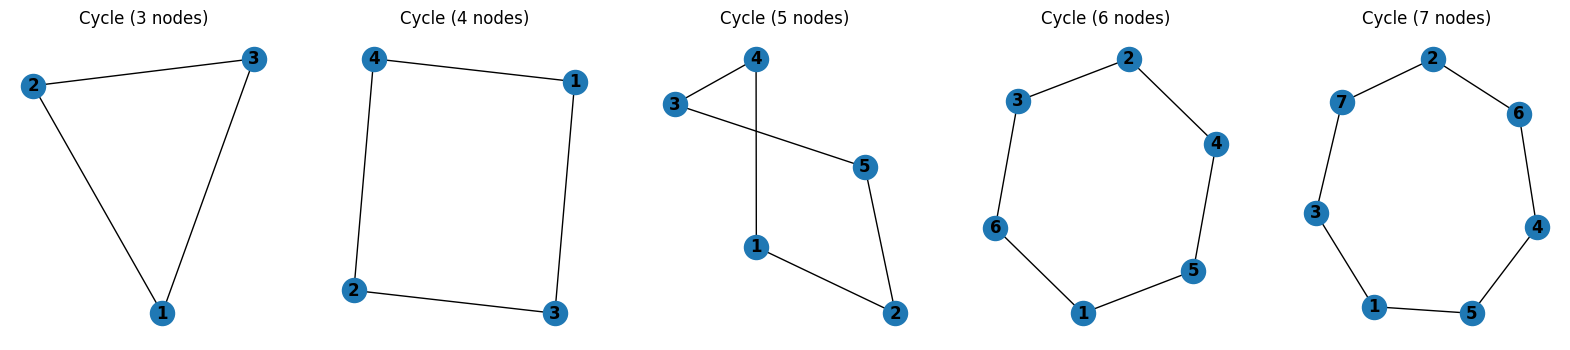

In [262]:
plt.figure(figsize=(20, 4))
for i in range(3,8):
    nx_graph = nx.Graph(cycle(i))
    subax1 = plt.subplot(148+i)
    nx.draw(nx_graph, with_labels=True, font_weight='bold')
    subax1.set_title(f"Cycle ({i} nodes)")